In [1]:
# NLP, 텍스트 분석
# NLP는 머신이 인간의 언어를 이해하고 해석하는 데 더 중점을 두고 기술일 발전해 왔으며, (기계 번역, 자동 질의응답 시스템)
# 텍스트 분석은 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 좀 더 중점을 두고 기술이 발전해왔다.
# 텍스트 분석은 머신러닝, 언어 이해, 통계 등을 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스나 예측 분석 등의 작업을 주로 수행.
# 텍스트 분류(스팸 메일 검출), 감성 분석(주관적인 요소 분석, 긍정/부정 리뷰, 여론조사, 지도학습/비지도학습)
# 텍스트 요약(주제나 중심 사상을 추출-토픽 모델링), 텍스트 군집화와 유사도 측정

# 텍스트 분석 수행 프로세스
# 1.텍스트 전처리 : 텍스트를 피처로 만들기 전 미리 클렌징, 토큰화 작업, 의미 없는 단어 제거, 어근 추출(stemming) 등의 텍스트 정규화 작업
# 2.피처 벡터화/추출 : 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당. 대표적으로 BOW(Count, TF-IDF) /Word2Vec이 있음
# 3.ML 모델 수립 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행한다.

## 토큰화
### 문장 토큰화 : 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적이다.

In [2]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room.  \
               You can see it out your window or on your television.  \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 단어 토큰화
#### 문장을 단어로 토큰화하는 것이다.
#### 기본적으로 공백, 콤마, 마침표, 개행문자 등으로 단어를 분리하지만, 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행할 수 있다.

In [3]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)            

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [4]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성.
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


## 스톱 워드 제거
#### 분석에 큰 의미가 없는 단어를 지칭한다. 가령 영어에서 is,the,a,will 등 문장을 구성하는 필수 문법 요소지만 문맥적으로 의미가 없는
#### 단어가 이에 해당한다. 이 단어의 경우 빈번하게 텍스트에 나타나므로 사전에 제거하지 않으면 오히려 중요한 단어로 인지될 수 있다.

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
print('영어 stop words 개수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [7]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens=[]
# 위 예제에서 3개의 문장별로 얻은 word_tokens_list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        # 소문자로 모두 변환합니다.
        word = word.lower()
        # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
print(all_tokens)    

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


## Stemming과 Lemmatization
#### 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것이다.
#### Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾는다. 
#### Stemming은 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 훼손된 어근 단어를 추출
#### Lemmatization은 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아준다. 그래서
#### Stemming보다 변환에 더 오랜 시간을 필요로 한다.

In [8]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [9]:
# 앞의 Stemmer보다 정확하게 원형 단어를 추출해줌을 알 수 있다.

# lemmatize()의 파라미터로 동사의 경우 'v', 형용사의 경우 'a'를 입력한다.
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))     

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


## Bag of Words - BOW
#### 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델이다.
#### BOW 모델의 장점은 쉽고 빠른 구축에 있다. 단순히 단어의 발생 횟수에 기반하고 있지만, 예상보다 문서의 특징을 잘 나타낼 수 있는 모델
#### 이어서 전통적으로 여러 분야의 활용도가 높다.
#### 하지만 NLP연구에는 문맥 의미 반영 부족, 희소 행렬 문제로 어려움이 있다.

## BOW 피처 벡터화 (카운트 기반의 벡터화 / TF-IDF)
##### 머신러닝은 텍스트와 같은 데이터는 바로 입력할 수 없다. 그래서 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환해야 하는데,
##### 이를 피처 벡터화라고 한다.
##### 카운트 벡터화 : 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 Count를 부여하는 경우
##### TF-IDF: 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를
##### 주는 방식으로 값을 부여한다.
#### 문서마다 텍스트가 길고 문서의 개수가 많은 경우 카운트 방식보다는 TF-IDF 방식을 사용하는 것이 더 좋은 예측 성능을 보장한다.

In [10]:
# Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidVectorizer
# CountVectorizer 클래스는 카운트 기반의 벡터화를 구현한 클래스이다. 단지 피처 벡터화만 수행하지는 않으며
# 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행한다.
# 사전 데이터 가공(모든 문자를 소문자로 변환) -> 토큰화 -> 텍스트 정규화(Stop Words 필터링만) -> 피처 벡터화

# 희소행렬 : 대규모의 행렬이 생성되더라도 레코드의 각 문서가 가지는 단어의 수는 제한적이기 때문에 이 행렬의 값은 대부분 0이 차지한다.
# 이처럼 대규모 행렬의 대부분의 값을 0이 차지한느 행렬을 가리켜 희소 행렬이라 한다. BOW 형태의 언어 모델의 피처 벡터화는 대부분 희소행렬.
# 이 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환해야 하는데, 대표적인 방법으로 COO 형식과 CSR 형식이 있다.
# 일반적으로는 큰 희소 행렬을 저장하고 계산을 수행하는 능력이 더 뛰어난 CSR 형식을 많이 사용한다.

## COO 형식
#### 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식이다.

In [11]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

In [12]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [13]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [14]:
[[0,0,1,0,0,5],[1,4,0,3,2,5],[0,6,0,3,0,0],[2,0,0,0,0,0],[0,0,0,7,0,8],[1,0,0,0,0,0]]

[[0, 0, 1, 0, 0, 5],
 [1, 4, 0, 3, 2, 5],
 [0, 6, 0, 3, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [0, 0, 0, 7, 0, 8],
 [1, 0, 0, 0, 0, 0]]

## CSR 형식
#### COO형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식이다.

In [15]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])
# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

#CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [16]:
dense3 = np.array([[0,0,1,0,0,5],
                 [1,4,0,3,2,5],
                 [0,6,0,3,0,0],
                 [2,0,0,0,0,0],
                 [0,0,0,7,0,8],
                 [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

## 텍스트 분류 실습 - 20 뉴스그룹 분류
#### 텍스트를 피처 벡터화로 변환하면 일반적으로 희소 행렬 형태가 된다. 그리고 이러한 희소 행렬에 분류를 효과적으로 처리할 수 있는 알고리즘은
#### 로지스틱 회귀, 선형 서포트 벡터 머신, 나이브 베이즈이다. 텍스트를 기반으로 분류를 수행할 때는 
#### 먼저 텍스트를 정규화한 뒤 피처 벡터화를 적용한다.
#### 그 이후의 적합한 머신러닝 알고리즘으로 학습/예측/평가한다.

In [17]:
# 텍스트 정규화
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)

In [18]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [19]:
import pandas as pd

print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [20]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

In [21]:
# 내용을 제거하고 제목 드으이 다른 정보는 제거한다. 헤더와 푸터 정보들은 Target 클래스 값과 유사한 데이터를 가지고 있는 경우 때문에
from sklearn.datasets import fetch_20newsgroups

# subset = 'train'으로 학습용 데이터만 추출, remove = ('headers','footers','quotes')로 내용만 추출
train_news = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'),
                  random_state =156)
X_train = train_news.data
y_train = train_news.target

# subset = 'test'로 테스트 데이터만 추출. remove=('headers','footers','quotes')로 내용만 추출
test_news = fetch_20newsgroups(subset='test', remove = ('headers','footers','quotes'),
                              random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기{0}, 테스트 데이터 크기{1}'.format(len(train_news.data),
                                          len(test_news.data)))

학습 데이터 크기11314, 테스트 데이터 크기7532


In [22]:
# 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 피처 벡터화 변환 수행.
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit()된 CountVectorizer를 이용해 테스트 데이터를 피터 벡처화 변환 수행.
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 텍스트의 CountVectorizer Shape:',X_train_cnt_vect.shape)

학습 데이터 텍스트의 CountVectorizer Shape: (11314, 101631)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용해 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect,y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression의 예측 정확도는 0.607


C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화를 적용해 학습 데이터 세트와 테스트데이터 세트 변환.
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용해 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))
# 일반적으로 문서 내에 텍스트가 많고 많은 문서를 가지는 텍스트 분석에서 카운트 벡터화보다는 TF-IDF 벡터화가 좋은 예측 결과를 도출한다.

TF-IDF Logistic Regression의 예측 정확도는 0.674


In [25]:
# 텍스트 분석에서 머신러닝 모델의 성능을 향상시키는 중요한 2가지 방법은 최적의 ML알고리즘을 선택하는 것과 최상의 피처 전처리 수행이다.

# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경해 피처 벡터화 적용.
tfidf_vect = TfidfVectorizer(stop_words = 'english',ngram_range=(1,2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.692


In [26]:
# GridSearchCV를 이용해 하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 폴드 세트로 설정.
params = { 'C':[0.01,0.1,1,5,10]}
grid_cv_lr = GridSearchCV(lr_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter:', grid_cv_lr.best_params_)

# 최적 C 값으로 학습된 grid_cv로 예측 및 정확도 평가.
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF - IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))
# 로지스틱 회귀의 C가 10일 때 GridSearchCV의 교차 검증 테스트 세트에서 가장 좋은 예측 성능을 나타냈고, 이전보다 향상된 수치이다.

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Logistic Regression best C parameter: {'C': 10}
TF - IDF Vectorized Logistic Regression의 예측 정확도는 0.701


In [27]:
# 사이킷런 파이프라인 사용 및 GridSearchCV와의 결합
# Pipeline이란 데이터의 가공, 변환 등의 전처리와 알고리즘 적용을 마치 '수도관(pipe)에서 물이 흐르듯'한꺼번에 스트림 기반으로 처리한다.
# 피처 벡터화와 ML 알고리즘 학습/예측을 위한 코드 작성을 한 번에 진행할 수 있다.
# 일반적으로 사이킷런 파이프라인은 텍스트 기반의 피처 벡터화뿐만 아니라 모든 데이터 전처리 작업과 Estimator를 결합할 수 있다.
# 예를 들어 스케일링 또는 벡터 정규화, PCA 등의 변환 작업과 분류, 회귀 등을 Estimator를 한 번에 결합한다.
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect로, LogisticRegression객체를 lr_clf로 생성하는 Pipeline 생성
pipeline = Pipeline([
    ('tfidf_vect',TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(C=10))
])
# 별도의 TfidfVectorizer 객체의 fit(), transform()과 LogisticRegression의 fit(), predict()가 필요없음
#pipeline의 fit()과 predict()만으로 한꺼번에 피처 벡터화와 ML 학습/예측이 가능.
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline을 통한 Logistic Regression의 예측 정확도는 0.701


In [28]:
# 로지스틱 회귀
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_) 2개를 연달아 붙여 GridSearchCV에 사용될 파라미터/하이퍼 파라미터 이름과 값 설정
params= { 'tfidf_vect__ngram_range':[(1,1),(1,2),(1,3)],
        'tfidf_vect__max_df':[100,300,700],
        'lr_clf__C':[1,5,10]
        }

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params,scoring='accuracy', cv=3, verbose=1) 
grid_cv_pipe.fit(X_train, y_train)
print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

{'lr_clf__C': 10, 'tfidf_vect__max_df': 300, 'tfidf_vect__ngram_range': (1, 2)} 0.7536687914006531
Pipeline을 통한 Logistic Regression의 예측 정확도는 0.701


In [29]:
# 선형 서포트 벡터머신
import sklearn.svm as svm

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('SVM', svm.SVC(kernel = 'linear'))
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_) 2개를 연달아 붙여 GridSearchCV에 사용될 파라미터/하이퍼 파라미터 이름과 값 설정
params= { 'tfidf_vect__ngram_range':[(1,1),(1,2),(1,3)],
        'tfidf_vect__max_df':[100,300,700],
        'SVM__C':[1,5,10]
        }

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params,scoring='accuracy', cv=3, verbose=1) 
grid_cv_pipe.fit(X_train, y_train)
print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'SVM__C': 1, 'tfidf_vect__max_df': 300, 'tfidf_vect__ngram_range': (1, 2)} 0.7503981005532445
Pipeline을 통한 Logistic Regression의 예측 정확도는 0.695


# 감성 분석
##### 문서의 주관적인 감성/의견/감정/기분 등을 파악하기 위한 방법으로 소셜 미디어, 여론조사, 온라인 리뷰, 피드백 등 다양한 분야에 활용
##### 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성 수치를 계산하는 방법을 이용한다.
##### 이러한 감성 지수는 긍정/부정 감성 지수로 구성되며 합산해 긍정/부정 감성을 결정한다.
##### 머신러닝 관점에서 지도학습(분류와 동일)과 비지도학습(lexicon 어휘사전 이용) 방식으로 나눌 수 있다.

## 지도학습 기반 감성 분석 실습 - IMDB 영화평

In [31]:
import pandas as pd

review_df = pd.read_csv('./labeledTrainData.tsv',header=0, sep="\t", quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [32]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [33]:
import re

#<br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
# 정규표현식 [^a-zA-Z]의 의미는 영어 대/소문자가 아닌 모든 문자를 찾는 것이다.
review_df['review'] = review_df['review'].apply(lambda x :re.sub("[^a-zA-Z]"," ",x))

In [34]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'],axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('cnt_vect',CountVectorizer(stop_words = 'english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행.
pipeline.fit(X_train['review'],y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC_AUC는 {1:.4f}'.format(accuracy_score(y_test,pred),
                                                 roc_auc_score(y_test,pred_probs)))

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도는 0.8860, ROC_AUC는 0.9503


In [36]:
# 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words = 'english', ngram_range=(1,2))),
    ('lr_clf',LogisticRegression(C=10))
])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f},ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test,pred),
                                               roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936,ROC-AUC는 0.9598


## 비지도학습 기반 감성 분석 ('Lexicon')
#### Lexicon은 감성 어휘 사전으로, 긍정/부정 감성의 정도를 의미하는 수치를 가지고 있으며 이를 감성 지수라고 한다.
#### 감성 지수는 단어의 위치나 주변 단어, 문맥, POS 등을 참고해 결정된다.

In [37]:
# NLP 패키지 속 WordNet은 단순한 어휘 사전이 아닌 시맨틱 분석을 제공하는 어휘 사전이다.
# 시맨틱은 문맥상 의미이다.
# WordNet은 다양한 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보를 제공하며, 이를 위해 각각의 품사로 구성된 개별 단어를
# Synset이라는 개념을 이용해 표현한다. Synset은 단순한 하나의 단어가 아니라 그 단어가 가지는 문맥,시맨틱 정보를 제공하는 WordNet의 핵심
# SentiWordNet : 긍정 감성 지수, 부정 감성 지수, 객관성 지수
# VADER : 주로 소셜 미디어의 텍스트에 대한 감성 분석

### SentiWordNet을 이용한 감성 분석

In [38]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\

[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading p

[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading pack

True

In [39]:
# 'present.n.01'은 POS 태그를 나타낸다. 'present.n.01'에서 present는 의미, n은 명사 품사, 01은 present가 명사로서 가지는 의미가
# 여러 가지 있어서 이를 구분하는 인덱스이다.
from nltk.corpus import wordnet as wn

term = 'present'

#'present'라는 단어로 wordnet의 synsets 생성.
synsets = wn.synsets(term)
print('synsets() 반환 type:',type(synsets))
print('synsets() 반환 값 개수:',len(synsets))
print('synsets() 반환 값:',synsets)

synsets() 반환 type: <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [40]:
# Synset은 POS(Part of Speech:품사),정의, 부명제 등으로 시맨틱적인 요소를 표햔할 수 있다.
for synset in synsets:
    print('#### Synset name :',synset.name(), '####')
    print('POS :',synset.lexname())
    print('Definition:',synset.definition())
    print('Lemmas:',synset.lemma_names())

#### Synset name : present.n.01 ####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
#### Synset name : present.n.02 ####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
#### Synset name : present.n.03 ####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
#### Synset name : show.v.01 ####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
#### Synset name : present.v.02 ####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
#### Synset name : stage.v.01 ####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represent']
#### Synset na

In [41]:
# WordNet은 어떤 어휘와 다른 어휘 간의 관계를 유사도로 나타낼 수 있다.
# synset 객체는 단어 간의 유사도를 나타내기 위해서 path_similarity()메서드를 제공한다.
# synset 객체를 단어별로 생성합니다.
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정합니다.
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity),2)
                 for compared_entity in entities]
    similarities.append(similarity)

# 개별 단어별 synset과 다른 언어의 synset과의 유사도를 DataFrame 형태로 저장합니다.
similarity_df = pd.DataFrame(similarities, columns = entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [42]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type:',type(senti_synsets))
print('senti_synsets() 반환 값 개수:',len(senti_synsets))
print('senti_synsets() 반환 값 :',senti_synsets)

senti_synsets() 반환 type: <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [43]:
# SentiSynset 객체는 단어의 감성을 나타내는 감성 지수와 객관성을 나타내는 객관성 지수를 가지고 있다.
# 감성 지수는 다시 긍정 감성 지수와 부정 감성 지수로 나뉜다. 어떤 단어가 전혀 감성적이지 않으면 객관성 지수는 1이 되고,
# 감성 지수는 모두 0이 된다.
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수:',father.pos_score())
print('father 부정감성 지수:',father.neg_score())
print('father 객관성 지수:',father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수:',fabulous.pos_score())
print('fabulous 부정감성 지수:',fabulous.neg_score())

father 긍정감성 지수: 0.0
father 부정감성 지수: 0.0
father 객관성 지수: 1.0


fabulous 긍정감성 지수: 0.875
fabulous 부정감성 지수: 0.125


In [44]:
# SentiWordNet을 이용한 영화 감상평 감성 분석
# 1. 문서를 문장 단위로 분해
# 2. 다시 문장을 단어 단위로 토큰화하고 품사 태깅
# 3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성
# 4. Senti_synset에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로,그렇지 않으면 부정 감성
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

In [45]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            
            #WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos = wn_tag)
            if not lemma:
                continue
            #어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성.
            synsets = wn.synsets(lemma, pos = wn_tag)
            if not synsets:
                continue
            #sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산.
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count +=1
       
    if not tokens_count:
        return 0
    # 총 score가 0 이상일 경우 긍정(positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0:
        return 1
    
    return 0    

In [46]:
import pandas as pd

train_df = pd.read_csv('./labeledTrainData.tsv',header=0, sep="\t", quoting=3)
import re
#<br> html 태그는 replace 함수로 공백으로 변환
train_df['review'] = train_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
train_df['review'] = train_df['review'].apply(lambda x :re.sub("[^a-zA-Z]"," ",x))



train_df['preds'] = train_df['review'].apply(lambda x :swn_polarity(x))
y_target = train_df['sentiment'].values
preds = train_df['preds'].values

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np
print(confusion_matrix(y_target, preds))
print("정확도:", np.round(accuracy_score(y_target, preds),4))
print("정밀도:", np.round(precision_score(y_target, preds),4))
print("재현율:", np.round(recall_score(y_target, preds),4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


## VADER를 이용한 감성 분석
#### VADER는 소셜 미디어의 감성 분석 용도로 만들어진 룰 기반의 Lexicon이다

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(train_df['review'][0])
print(senti_scores)
# compound는 neg,neu,pos score를 적절히 조합해 -1에서 1 사이의 감성 지수를 표현한 값이다. 
# 보통 0.1 이상이면 긍정 감성, 그 이하이면 부정 감성으로 판단하나 상황에 따라 이 임계값을 적절히 조정해 예측 성능을 조절한다.

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [49]:
def vader_polarity(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x : vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print("정확도:",np.round(accuracy_score(y_target, vader_preds),4))
print("정밀도:",np.round(precision_score(y_target, vader_preds),4))
print("재현도:",np.round(recall_score(y_target, vader_preds),4))

# 감성 사전을 이용한 감성 분석 예측 성능은 지도학습 분류 기반의 예측 성능에 비해 아직은 낮은 수준이지만 결정 클래스 값이 없는 상황을
# 고려한다면 예측 성능에 일정 수준 만족할 수 있을 것이다.

[[ 6747  5753]
 [ 1858 10642]]
정확도: 0.6956
정밀도: 0.6491
재현도: 0.8514


## 토픽 모델링 - 20 뉴스그룹
#### 토픽 모델링이란 문서 집합에 숨어 있는 주제를 찾아내는 것이다.
#### 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은 LSA이다

In [50]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출.
cats = ['rec.motorcycles', 'rec.sport.baseball','comp.graphics','comp.windows.x',
       'talk.politics.mideast', 'soc.religion.christian','sci.electronics','sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출, fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                            categories = cats, random_state=0)
# LDA는 Count기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df = 0.95, max_features=1000, min_df =2, stop_words = 'english',
                            ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [51]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [52]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [53]:
# display_topics()함수를 만들어서 각 토픽별로 연관도가 높은 순으로 Word를 나열한다.
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        
        # components_array에서 가장 큰 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]
        
        # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)
        
# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출 -> get_feature_names_out()으로 변경
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


## 문서 군집화 소개와 실습
### 문서 군집화는 비슷한 텍스트 구성의 문서를 군집화하는 것이다. 텍스트 분류 기반의 문서 분류와 유사하다. 하지만, 
### 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한 데 반해,
### 문서 군집화는 학습 데이터 세트가 필요없는 비지도학습 기반으로 동작한다.

In [54]:
import pandas as pd
import glob, os

# 압축 파일 디렉터리 설정
path = r"C:\Users\Leedonghoon\Desktop\주피터\OpinosisDataset1.0\topics"
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list=[]
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합.
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df =pd.read_table(file_, index_col = None, header=0, encoding='latin1')
    
    # 절대 경로로 주어진 파일명을 가공. 리눅스에서 수행할 때는 다음 \\를 /로 변경.
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    
    # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...


In [55]:
# LemNormalize()함수 가져오기
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens)

In [56]:
# 문서르 TF-IDF 형태로 피처 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
                            ngram_range=(1,2), min_df = 0.05, max_df = 0.85)
# opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [57]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행.
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,2
1,bathroom_bestwestern_hotel_sfo,...,0
2,battery-life_amazon_kindle,...,1
3,battery-life_ipod_nano_8gb,...,1
4,battery-life_netbook_1005ha,...,1


In [59]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,...,0
32,room_holiday_inn_london,...,0
30,rooms_bestwestern_hotel_sfo,...,0
31,rooms_swissotel_chicago,...,0


In [60]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,...,1
3,battery-life_ipod_nano_8gb,...,1
4,battery-life_netbook_1005ha,...,1
19,keyboard_netbook_1005ha,...,1
26,performance_netbook_1005ha,...,1
41,size_asus_netbook_1005ha,...,1
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,1
44,speed_windows7,...,1


In [61]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,2
5,buttons_amazon_kindle,...,2
8,directions_garmin_nuvi_255W_gps,...,2
9,display_garmin_nuvi_255W_gps,...,2
10,eyesight-issues_amazon_kindle,...,2
11,features_windows7,...,2
12,fonts_amazon_kindle,...,2
23,navigation_amazon_kindle,...,2
33,satellite_garmin_nuvi_255W_gps,...,2
34,screen_garmin_nuvi_255W_gps,...,2


In [62]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
13,food_holiday_inn_london,...,3
14,food_swissotel_chicago,...,3
15,free_bestwestern_hotel_sfo,...,3
20,location_bestwestern_hotel_sfo,...,3
21,location_holiday_inn_london,...,3
24,parking_bestwestern_hotel_sfo,...,3
27,price_amazon_kindle,...,3
28,price_holiday_inn_london,...,3
38,service_bestwestern_hotel_sfo,...,3
39,service_holiday_inn_london,...,3


In [63]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,...,4
7,comfort_toyota_camry_2007,...,4
16,gas_mileage_toyota_camry_2007,...,4
17,interior_honda_accord_2008,...,4
18,interior_toyota_camry_2007,...,4
22,mileage_honda_accord_2008,...,4
25,performance_honda_accord_2008,...,4
29,quality_toyota_camry_2007,...,4
37,seats_honda_accord_2008,...,4
47,transmission_toyota_camry_2007,...,4


In [64]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
clutser_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
48,updates_garmin_nuvi_255W_gps,...,0
44,speed_windows7,...,0
43,speed_garmin_nuvi_255W_gps,...,0
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,0
41,size_asus_netbook_1005ha,...,0
36,screen_netbook_1005ha,...,0
35,screen_ipod_nano_8gb,...,0
34,screen_garmin_nuvi_255W_gps,...,0
33,satellite_garmin_nuvi_255W_gps,...,0


In [65]:
# 군집별 핵심 단어 추출하기
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape:',cluster_centers.shape)
print(cluster_centers) # 군집 3개, word 피처가 2409개

cluster_centers shape: (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


In [66]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num,
                       top_n_features = 10):
    cluster_details= {}
    
    # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함.
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함.
        top_feature_values = cluster_model.cluster_centers_[cluster_num,
                                                           top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['filename']
        
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details    

In [67]:
# get_cluster_details()를 호출하면 dictionary를 원소로 가지는 리스트인 cluster_details를 반환한다.
# 이 cluster_details에는 개별 군집번호, 핵심 단어, 핵심단어 중심 위치 상댓값, 파일명 속성 값 정보를 더 좋게 표현하기 위헤
# print_cluster_details() 생성
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('###### cluster {0}'.format(cluster_num))
        print('Top features:',cluster_detail['top_features'])
        print('Reviews 파일명:', cluster_detail['filenames'][:7])
        print('==============================================')

In [68]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(cluster_model = km_cluster, cluster_data = document_df,
                                      feature_names = feature_names, clusters_num = 3, top_n_features=10)
print_cluster_details(cluster_details)

###### cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명: 0      accuracy_garmin_nuvi_255W_gps
2         battery-life_amazon_kindle
3         battery-life_ipod_nano_8gb
4        battery-life_netbook_1005ha
5              buttons_amazon_kindle
8    directions_garmin_nuvi_255W_gps
9       display_garmin_nuvi_255W_gps
Name: filename, dtype: object
###### cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명: 6         comfort_honda_accord_2008
7         comfort_toyota_camry_2007
16    gas_mileage_toyota_camry_2007
17       interior_honda_accord_2008
18       interior_toyota_camry_2007
22        mileage_honda_accord_2008
25    performance_honda_accord_2008
Name: filename, dtype: object
###### cluster 2
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price

## 문서 유사도
### 문서 유사도 측정 방법 - 코사인 유사도
#### 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지를 기반한다.
#### 즉, 코사인 유사도는 두 벡터 사이의 사잇갓을 구해서 얼마나 유사한지 수치로 적용한 것이다.

In [69]:
# 두 벡터 사잇각
# 두 벡터의 사잇각에 따라서 상호 관계는 유사하거나 관련이 없거나 아예 반대 관계가 될 수 있다.
# A*B = ∥A∥∥B∥cosθ
# similrity = cosθ = A*B / ∥A∥∥B∥ 

In [70]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1,v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    
    return similarity

In [71]:
# doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
           'if you take the red pill, you stay in Wonderland',
           'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [72]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2, Cosine 유사도:{0:.3f}'.format(similarity_simple))

문장 1, 문장 2, Cosine 유사도:0.402


In [73]:
# 첫 번째 문장과 세 번째 문장, 그리고 두 번째 문장과 세 번째 문장의 유사도 측정
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도:{0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도:{0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도:0.404
문장 2, 문장 3 Cosine 유사도:0.456


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [75]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [76]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


## Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [77]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\Users\Leedonghoon\Desktop\주피터\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list=[]
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합.
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df =pd.read_table(file_, index_col = None, header=0, encoding='latin1')
    
    # 절대 경로로 주어진 파일명을 가공. 리눅스에서 수행할 때는 다음 \\를 /로 변경.
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    
    # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                            ngram_range=(1,2), min_df = 0.05, max_df = 0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 1인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('#### 비교 기준 문서명:', comparison_docname, '와 타 문서 유사도#####')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Int64Index([6, 7, 16, 17, 18, 22, 25, 29, 37, 47], dtype='int64')
#### 비교 기준 문서명: comfort_honda_accord_2008 와 타 문서 유사도#####
[[1.         0.83969704 0.15655631 0.33044002 0.25981841 0.16544257
  0.27569738 0.18050974 0.65502034 0.06229873]]


Text(0.5, 1.0, 'comfort_honda_accord_2008')

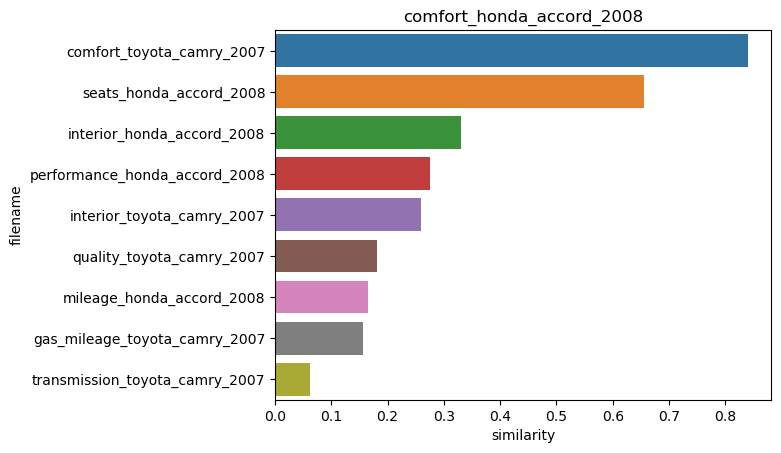

In [79]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외.
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

## 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

In [80]:
# 한글 NLP 처리의 어려움
# 한글 언어 처리는 '띄어쓰기'와 '다양한 조사' 때문에 처리 하기가 어렵다.

# KoNLPy는 파이썬의 대표적인 한글 형태소 패키지이다. 형태소의 사전적인 의미는 '단어로서 의미를 가지는 최소 단위'로 정의할 수 있다.
# 형태소 분석이란 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업을 일반적으로 지칭한다.

In [81]:
import pandas as pd

train_df = pd.read_csv('ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [82]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [83]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+"," ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d+", " ", x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [84]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 돌아온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [85]:
# TF-IDF 피처 모델 생성
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df = 3, max_df = 0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [86]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = {'C':[1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

{'C': 3.5} 0.8592


C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:',accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86184


## 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge

In [112]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [113]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


C:\Users\Leedonghoon\AppData\Local\Temp\ipykernel_2476\1624948795.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

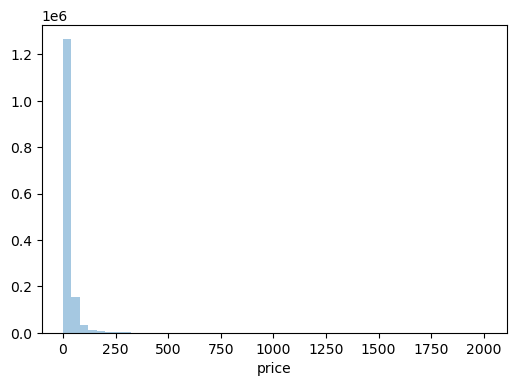

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)

C:\Users\Leedonghoon\AppData\Local\Temp\ipykernel_2476\877343267.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

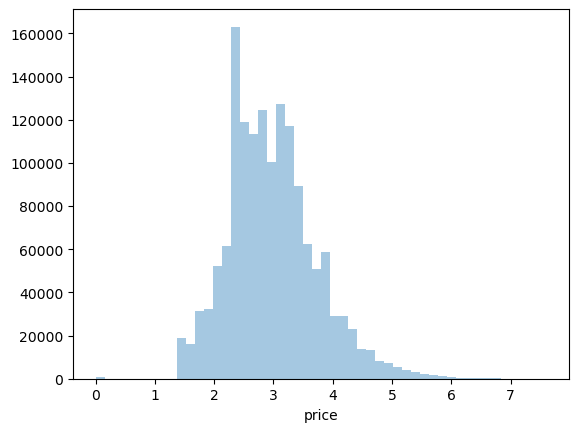

In [115]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

In [116]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [117]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [118]:
boolean_cond = mercari_df['item_description'] =='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [119]:
# apply lambda에서 호출되는 대, 중, 소 분할 함수 생성, 대,중,소 값을 리스트로 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null', 'Other_Null', 'Other_Null']
# 위의 split_cat()을 apply lambda에서 호출해 대,중,소 칼럼을 mercari_df에 생성
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형:\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수:', mercari_df['cat_jung'].nunique())
print('소분류 개수:', mercari_df['cat_so'].nunique())

대분류 유형:
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수: 114
소분류 개수: 871


In [120]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
# 각 칼럼별로 Null 값 건수 확인. 
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     4
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

In [122]:
# 피처 인코딩과 피처 벡터화
print('brand name의 유형 건수:', mercari_df['brand_name'].nunique())
print('brand name sample 5건: \n', mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수: 4810
brand name sample 5건: 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [124]:
print('name 의 종류 개수:',mercari_df['name'].nunique())
print('name sample 10건: \n', mercari_df['name'][:10])

name 의 종류 개수: 1225273
name sample 10건: 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


In [125]:
pd.set_option('max_colwidth',200)

# item_description의 평균 문자열 크기
print('item_description 평균 문자열 크기:',mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 크기: 145.71175509989337


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [127]:
# name 속성에 대한 피처 벡터화 변환
# 잘 안될때 stack overflow 참고! 양이 너무 많아서 .values.astype('U') 사용. unicode로 변환해서 돌림
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name.values.astype('U'))

# item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'].values.astype('U'))

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)
# CountVectorizer, TfidfVectorizer가 fit_transform()을 통해 반환하는 데이터는 희소 행렬 형태이다.
# 희소 행렬 객체 변수인 X_name과 X_descp를 새로 결합해 새로운 데이터 세트로 구성해야 하고, 앞으로 인코딩 될 cat시리즈와, shipping,
# item_condition_id 모두 X_name, X_descp와 결합돼 ML모델을 실행하는 기반 데이터 세트로 재구성돼야 한다.
# 이를 위헤 LabelBinarizer클래스로 희소 행렬 형태의 원-핫 인코딩 변환한다.
# sparse패키지의 hstack()함수를 이용해 희소 행렬을 칼럼 레벨로 결합한다.

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


In [128]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [129]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
X_brand shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [131]:
from scipy.sparse import hstack
import gc
sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, \
                     X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합.
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

# 데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제.
del X_features_sparse
gc.collect()
# hstack()으로 결합한 데이터 세트는 csr_matrix 타입이며, 총 161569개의 피처를 가진다. 이를 가지고 데이터 세트에 회귀를 적용해
# price 값을 예측할 수 있도록 모델을 만든다..

<class 'scipy.sparse._csr.csr_matrix'> (1482535, 161569)


0

## 릿지 회귀 모델 구축 및 평가

In [135]:
# 모델을 평가하는 평가 로직을 함수화한다.(RMSLE)
# RMSLE는 RMSE와 유사하나 오류 값에 로그를 취해 RMSE를 구하는 방식이다. 낮은 가격보다 높은 가격에서 오류가 발생할 경우 오류 값이
# 더 커지는 것을 억제하기 위해 이 방식을 적용함.

# 원본 데이터의 price 칼럼의 값은 왜곡된 데이터 분포를 가지고 있기 때문에 이를 정규 분포 형태로 유도하기 위해 로그 값을 취해 변환한다.
# 즉, 학습할 모델이 사용할 price 값은 로그 값으로 변환된 price 값으로 예측도 당연히 로그로 변환한 price 값을 예측한다.
# 이를 위해 새로운 함수 생성 evaluate_org_price()
def rmsle(y, y_pred):
    # underflow, overflow를 막기 위해  log가 아닌 log1p로 rmsle계산
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):
    
    # 원본 데이터는 log1p로 변환되었으며 exmpm1로 원복 필요.
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [133]:
# 학습용 데이터를 생성하고, 모델을 학습/예측하는 로직을 별도의 함수로 생성.
# model_train_predict()함수는 model인자로 사이킷런의 회귀 estimator 객체를, matrix_list 인자로 최종 데이터 세트로 결합할
# 희소 행렬 리스트를 가진다. 평가 데이터 세트는 train_test_split()을 이용한다.
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    # scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
    X = hstack(matrix_list).tocsr()
    
    X_train,X_test, y_train,y_test = train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)
    
    # 모델 학습 및 예측
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    del X, X_train, X_test, y_train
    gc.collect()
    
    return preds, y_test

In [136]:
linear_model = Ridge(solver='lsqr', fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, \
                     X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list = sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:',evaluate_org_price(y_test,linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, \
                     X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list = sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:',evaluate_org_price(y_test, linear_preds))
# Item Description을 포함했을 때 rmsle값이 많이 감소 했다. Item description 영향이 중요함을 알 수 있다.

Item Description을 제외했을 때 rmsle 값: 0.4984190747688017
Item Description을 포함한 rmsle 값: 0.46804982743146967


## LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [137]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                     X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model =LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list = sparse_matrix_list)
print('LightGBM rmsle 값:', evaluate_org_price(y_test, lgbm_preds))
# Ridge보다 예측 성능이 더 나아졌다. 

LightGBM rmsle 값: 0.45663315515513714


In [138]:
# LightGBM 과 Ridge의 예측 결괏값을 서로 앙상블해 최종 예측 결괏값을 도출한다.
# 0.45와 0.55는 임의로 산정하여 계산하였다
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.44669005793728933


In [ ]:
# 머신러닝 기반의 텍스트 분석 프로세스는 첫째 텍스트 사전 정제 작업 드으이 텍스트 정규화 작업을 수행하고
# 둘째 이들 단어들을 피처 벡터화로 변환한다.
# 셋째 이렇게 생성된 피처 벡터 데이터 세트에 머신러닝 모델을 학습하고 예측,평가한다.

# 텍스트 정구화 작업을 텍스트 클렌징 및 대소문자 변경, 단어 토큰화, 의미 없는 단어 필터링, 어근 추출 등 피처 벡터화를 진행하기
# 이전에 수행하는 다양한 사전 작업을 의미한다.
# 피처 벡터화는 BOW의 대표 방식인 Count 기반과 TF-IDF 기반 피처 벡터화를 알아보았으며, 
# 일반적으로 문서의 문장이 긴 경우 TF-IDF 기반의 피처 벡터가 더 정확한 결과를 도출하는데 도움이 된다.
# 이렇게 만들어진 피처 벡터 데이터 세트는 희소 행렬이며, 머신러닝 모델은 이러한 희소 행렬 기반에서 최적화되어야 한다.

# 텍스트 분류절에서는 문서들을 피처 벡터화한 후 로지스틱 회귀를 적용해 문서를 지도학습 방식으로 예측 분류했다.
# 감성 분석절에서는 지도학습 기반으로 긍정/부정 이진 분류를 적용한 방식과 SentiWordNet, VADER와 같은 감성 사전 Lexicon을 이용한 두가지.
# 토픽 모델링은 LDA(Latent Dirichlet Allocation)를 이용해 뉴스그룹 내의 많은 문서들이 공통적으로 가지는 토픽들을 추출했다.
# 텍스트 군집화는 K-평균 군집화 기법을 이용해 비슷한 문서들끼리 군집화했고 텍스트 유사도 측정에서는 코사인 유사도를 이용해
# 문서들끼리 얼마나 비슷한지를 측정했다.
# 한글 형태소 분석기인 KoNLPy 패키지를 이용해 네이버에서 제공하는 한글로 된 영화 리뷰에 긍정/부정 이진 분류를 적용해 봤다.
# Mercari Price Challenge 실습에서는 정형 피처들과 텍스트와 같은 비정형 피처를 결합해 효과적으로 회귀 예측 모델을 구현했다.